# FDA HW2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 問題：看一個男森是否交得到女朋友
- 在這個複雜的社會到底要符合怎樣的條件才交的到女朋友呢

# 特徵
1. 身高 (介於 150cm - 195cm)
2. 體重 (介於 50kg - 100kg)
3. 收入 (介於 2w/m - 30w/m)
4. 長相 (介於 1 - 10)
5. 智商 (介於 55 - 145)
6. 年紀 (介於 20 - 50)
7. 身材 (介於 1 - 10)
8. 幽默感 (介於 1 - 10)
9. PTT愛用程度 (介於 1 - 10)

# 結果
- 魯掉: 魯是一個字也代表一種生活型態，後面加掉代表進入某種狀態，簡言之就是成為魯蛇的開始
- 啊嘶: 通常交到女朋友都會大叫一聲啊！！！而嘶則是尾音，因此啊嘶代表一種舒適的心情

# 規則 (我的 Decision Tree)

![](https://i.imgur.com/t65irbe.jpg)

# Create Data
- 身高、體重、收入、智商採常態分佈
- 其他的 attribute 隨機給值

In [29]:
def setValue(list_, low, value):
    for i in range(0,len(list_)):
        if list_[i] < low:
            list_[i] = value
            
    return list_

In [34]:
## Height
mu_Height, sigma_Height = 172.5, 7.5
Height = np.random.normal(mu_Height, sigma_Height, 10000)
Height = setValue(Height,150,150)

## Weight
mu_Weight, sigma_weight = 75, 10
Weight = np.random.normal(mu_Weight, sigma_weight, 10000)
Weight = setValue(Weight,50,50)

## Income
mu_Income, sigma_Income = 70000, 100000
Income = np.random.normal(mu_Income, sigma_Income, 10000)

## Face
Face = np.random.randint(0,11,size=10000)

## IQ
mu_IQ, sigma_IQ = 100, 15
IQ = np.random.normal(mu_IQ, sigma_IQ, 10000)
Income = setValue(Income,23000,23000)

## Age
Age = np.random.randint(20,51,size=10000)

## Body
Body = np.random.randint(0,11,size=10000)

## Humor
Humor = np.random.randint(0,11,size=10000)

## LovePtt
LovePtt = np.random.randint(0,11,size=10000)

In [35]:
data = {'Height': Height, 'Weight': Weight, 'Income': Income,
           'Face': Face, 'IQ': IQ, 'Age': Age, 'Body': Body, 'Humor': Humor, 'LovePtt': LovePtt}
df = pd.DataFrame(data=data)

In [37]:
df.head(10)

,Height,Weight,Income,Face,IQ,Age,Body,Humor,LovePtt
0,167.095170,72.523926,23000.000000,2,79.492778,41,10,10,6
1,169.456439,85.228317,58237.508372,1,101.989686,40,4,10,6
2,174.937503,97.958975,23000.000000,0,96.476087,26,9,4,10
3,186.382835,61.395259,23000.000000,3,109.561127,41,3,5,2
4,170.119223,64.735199,68979.198964,5,117.233922,21,3,0,4
5,159.384121,88.197093,23000.000000,8,101.362303,47,7,2,4
6,171.347557,76.049743,138621.791005,5,86.553840,31,1,9,10
7,171.278082,81.179052,23000.000000,5,70.489673,42,10,6,2
8,169.363823,72.670917,23000.000000,1,119.600856,39,6,0,3
9,180.365595,71.565664,218740.791037,8,103.752041,37,10,2,4


# Check every row to see if they can get girlfriend?

In [70]:
def girlFriend(x):
    if x[7] == 0:
        return 0
    elif x[7] > 0 and x[7] < 5:
        if x[3] < 5:
            return 0
        
        elif x[3] >= 4:
            if x[8] >= 6:
                return 0
            
            elif x[8] < 6:
                if x[2] > 100000:
                    return 1
                
                elif x[2] <= 100000:
                    return 0
                
    elif x[7] >= 5:
        if x[3] >= 7:
            return 1
        
        elif x[3] < 7:
            if x[6] >= 6:
                if x[0] >= 175:
                    return 1
                
                elif x[0] < 175 and x[0] >= 170:
                    if x[2] >= 50000:
                        return 1
                    
                    elif x[2] < 50000:
                        return 0
                    
                elif x[0] < 170:
                    if x[1] >= 70:
                        return 0
                    
                    elif x[1] < 70:
                        if x[8] >= 5:
                            return 0
                        
                        elif x[8] < 5:
                            if x[2] >= 70000:
                                return 1
                            
                            elif x[2] < 70000:
                                return 0
                                    
            elif x[6] < 6:
                if x[4] < 100:
                    return 0
                
                elif x[4] >= 100: 
                    if x[5] >= 40:
                        return 0
                    
                    elif x[5] < 40:
                        if x[8] >= 5:
                            return 0
                        
                        elif x[8] < 5:
                            if x[2] >= 60000:
                                return 1
                            elif x[2] < 60000:
                                return 0

In [71]:
df['Girlfriend'] = df[['Height','Weight','Income','Face','IQ',
                       'Age','Body','Humor','LovePtt']].apply(girlFriend,axis=1)

In [72]:
df.head(30)

,Height,Weight,Income,Face,IQ,Age,Body,Humor,LovePtt,Girlfriend
0,167.095170,72.523926,23000.000000,2,79.492778,41,10,10,6,0
1,169.456439,85.228317,58237.508372,1,101.989686,40,4,10,6,0
2,174.937503,97.958975,23000.000000,0,96.476087,26,9,4,10,0
3,186.382835,61.395259,23000.000000,3,109.561127,41,3,5,2,0
4,170.119223,64.735199,68979.198964,5,117.233922,21,3,0,4,0
5,159.384121,88.197093,23000.000000,8,101.362303,47,7,2,4,0
6,171.347557,76.049743,138621.791005,5,86.553840,31,1,9,10,0
7,171.278082,81.179052,23000.000000,5,70.489673,42,10,6,2,0
8,169.363823,72.670917,23000.000000,1,119.600856,39,6,0,3,0
9,180.365595,71.565664,218740.791037,8,103.752041,37,10,2,4,1


# Generate Decision Tree by sklearn

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import Image  
import pydot

In [73]:
X = df.drop('Girlfriend',axis=1)
y = df['Girlfriend']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [74]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

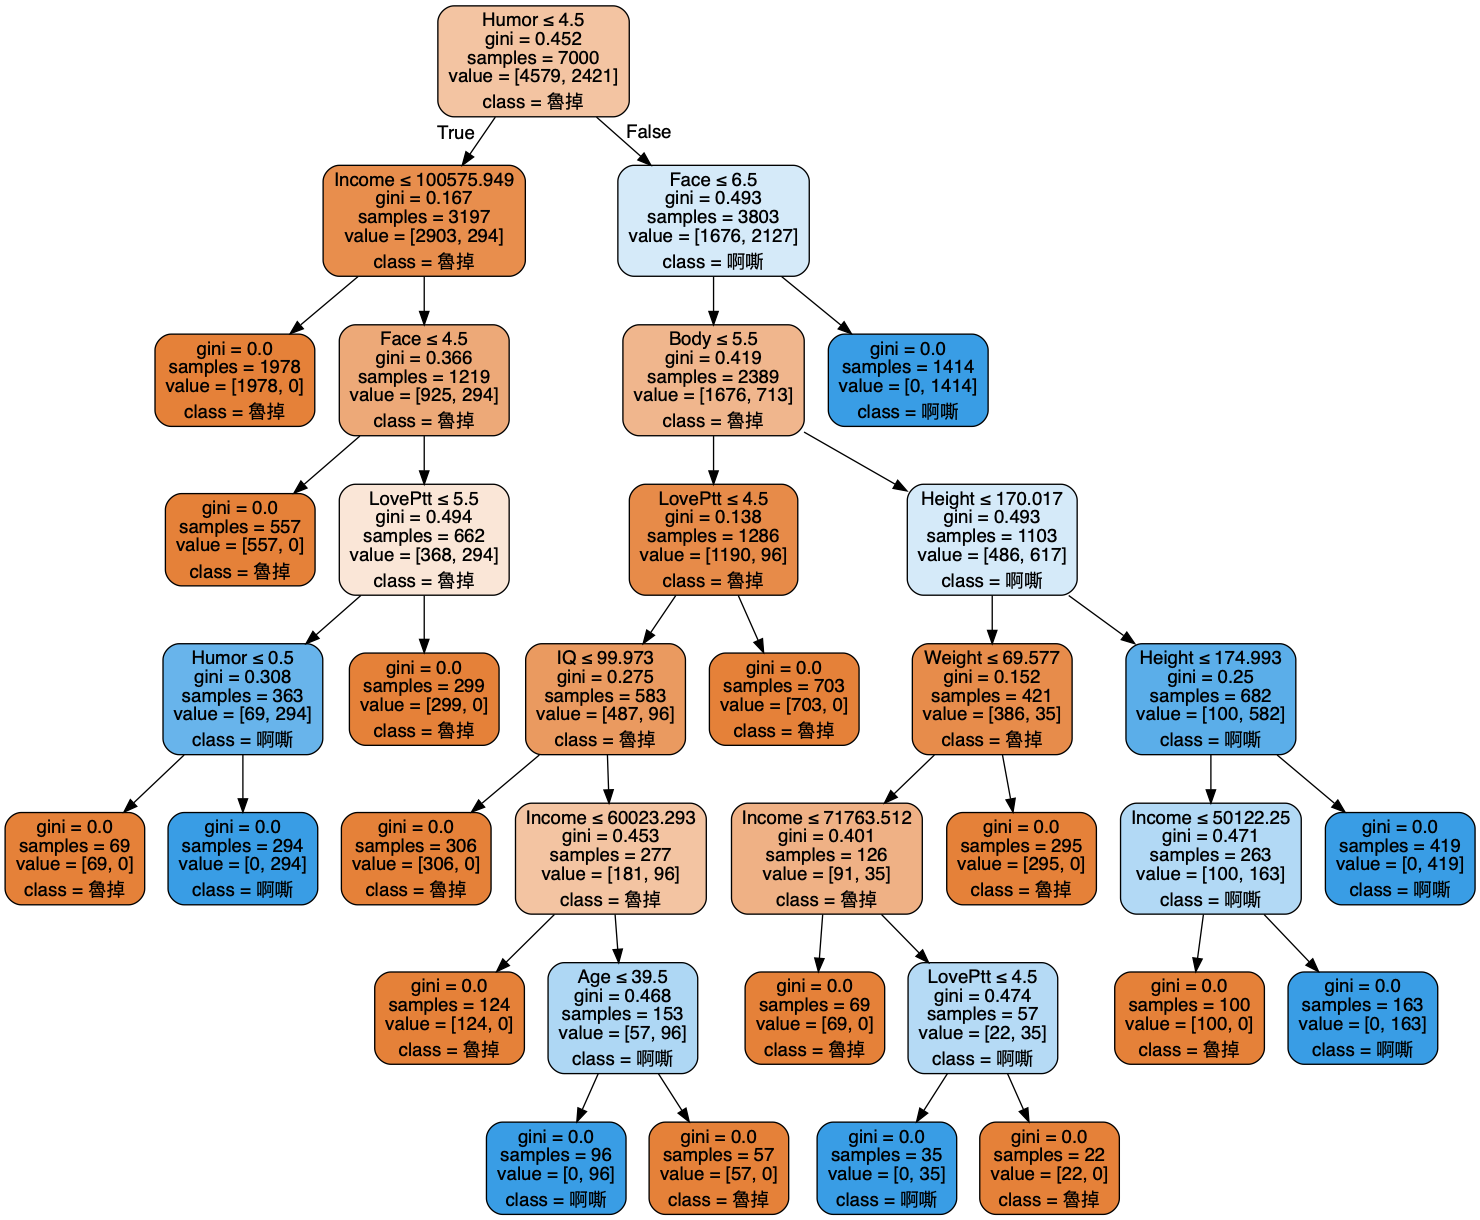

In [75]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=list(X_train),
                class_names=['魯掉','啊嘶'],filled=True,rounded=True,special_characters=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

# Check dtree accuracy
```
發現結果其實很準，但我好奇是哪些資料會測不準
```

In [76]:
predictions = dtree.predict(X_test)
accuracy_score(y_test, predictions)

0.9996666666666667

In [77]:
df_combine = X_test.merge(y_test.to_frame(), left_index=True, right_index=True)
df_combine['Prediction'] = predictions
df_combine[df_combine['Girlfriend'] != df_combine['Prediction']]

,Height,Weight,Income,Face,IQ,Age,Body,Humor,LovePtt,Girlfriend,Prediction
859,170.013276,85.632784,190943.457797,3,88.652811,36,7,7,6,1,0


# 討論差異

- 差異:
```
原本的 tree 有分裂成三個分支的，但利用 sklearn 產生出來的樹都只會 split 出兩個分支
會有這樣的結果是因為 sklearn 只能處理 numerical feature 而不是 categorical feature
而當面對 numerical feature 的時候，是很難建構出一個良好的分割規則(split 出超過兩個 children)
```

- 相似:
```
發現他們第一個 split 都是以 humor 開
```